In [6]:
from scipy import interpolate
from numpy import arange, meshgrid, exp

x = exp(arange(-5, 5))
y = exp(arange(-5, 10, 2))
x_grid, y_grid = meshgrid(x, y)
z = x_grid**2 - 3 * y_grid**2
new_x = exp(arange(1, 4, 1) + 0.5)
new_y = exp(arange(6, 9, 2) - 0.5)

new_x_grid, new_y_grid = meshgrid(new_x, new_y)
interpolate.RectBivariateSpline(x=x, y=y, z=z.T).ev(xi=new_x_grid, yi=new_y_grid) - (new_x_grid**2 - 3 * new_y_grid**2)

array([[ 1.16415322e-10,  8.73114914e-11,  1.07684173e-09],
       [ 3.72529030e-09, -7.45058060e-09,  3.91155481e-08]])

In [1]:
from src.utils import (
    load_complex_array_from_binary,
    harmonic_load_signal_trends_before_degree_one_replacement_path,
    harmonic_load_signal_trends_path,
)

elastic_load_signal_trends = load_complex_array_from_binary(
    name="0", path=harmonic_load_signal_trends_before_degree_one_replacement_path
).real

C_1_0, C_1_1, S_1_1 = (
    elastic_load_signal_trends[0, 1, 0],
    elastic_load_signal_trends[0, 1, 1],
    elastic_load_signal_trends[1, 1, 1],
)

computed_elastic_load_signal_trends = load_complex_array_from_binary(
    name="0", path=harmonic_load_signal_trends_path
).real

computed_C_1_0, computed_C_1_1, computed_S_1_1 = (
    computed_elastic_load_signal_trends[0, 1, 0],
    computed_elastic_load_signal_trends[0, 1, 1],
    computed_elastic_load_signal_trends[1, 1, 1],
)

print("initial:", C_1_0, C_1_1, S_1_1)
print("harmonic:", computed_C_1_0, computed_C_1_1, computed_S_1_1)


initial: -1.3969241064114184 -0.29512803307745983 -0.009185891899289048
harmonic: -1.6537449496621157 -0.3731620189431776 0.08609754036014679


initial: -0.970438943696056 -0.2050245502674671 -0.006381411266895834
harmonic: -1.5288426986581243 -0.36443389112749236 0.10738111880462999


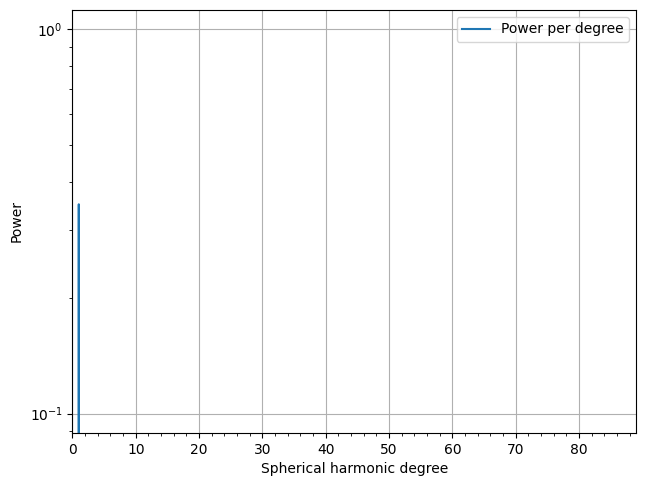

In [2]:
from src.utils import (
    load_complex_array_from_binary,
    harmonic_load_signal_trends_before_degree_one_replacement_path,
    harmonic_load_signal_trends_path,
)
from pyshtools import SHCoeffs

before_replacement_load_signal_trends = load_complex_array_from_binary(
    name="2", path=harmonic_load_signal_trends_before_degree_one_replacement_path
).real

C_1_0, C_1_1, S_1_1 = (
    before_replacement_load_signal_trends[0, 1, 0],
    before_replacement_load_signal_trends[0, 1, 1],
    before_replacement_load_signal_trends[1, 1, 1],
)

load_signal_trends = load_complex_array_from_binary(
    name="2", path=harmonic_load_signal_trends_path
).real

computed_C_1_0, computed_C_1_1, computed_S_1_1 = (
    load_signal_trends[0, 1, 0],
    load_signal_trends[0, 1, 1],
    load_signal_trends[1, 1, 1],
)

print("initial:", C_1_0, C_1_1, S_1_1)
print("harmonic:", computed_C_1_0, computed_C_1_1, computed_S_1_1)

from numpy import round
clm = SHCoeffs.from_array(
    coeffs=round(load_signal_trends - before_replacement_load_signal_trends, 6)
)
fig, ax = clm.plot_spectrum(show=False)

In [3]:
from src.utils import (
    compute_harmonic_signal_trends,
    get_ocean_mask,
    redefine_n_max,
    build_frequencial_harmonic_elastic_load_signal,
)
from src.utils.classes import load_load_signal_hyper_parameters
from src.functions import mean_on_mask

load_signal_hyper_parameters = load_load_signal_hyper_parameters()
(
    dates,
    frequencies,
    frequencial_harmonic_elastic_load_signal,
) = build_frequencial_harmonic_elastic_load_signal(
    load_signal_hyper_parameters=load_signal_hyper_parameters
)

ocean_mask = get_ocean_mask(
    name=load_signal_hyper_parameters.ocean_mask,
    n_max=redefine_n_max(
        n_max=load_signal_hyper_parameters.n_max,
        harmonics=frequencial_harmonic_elastic_load_signal,
    ),
)

frequencial_harmonic_elastic_load_signal[:, :2 ,:, :] = 0.0

mean_on_mask(
    mask=ocean_mask,
    harmonics=compute_harmonic_signal_trends(
        signal_dates=dates,
        load_signal_hyper_parameters=load_signal_hyper_parameters,
        frequencial_harmonic_signal=frequencial_harmonic_elastic_load_signal,
    ),
)

1.41083

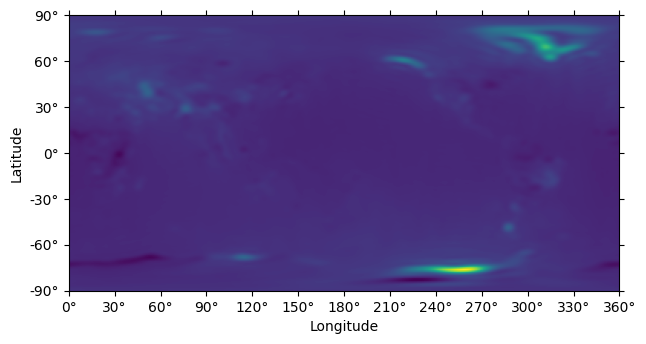

In [4]:
from src.utils import (
    load_complex_array_from_binary,
    harmonic_load_signal_trends_path,
)
from numpy import maximum, minimum
from pyshtools import SHCoeffs

trend_harmonics = load_complex_array_from_binary(
    name="2", path=harmonic_load_signal_trends_path
)
elastic_trend_harmonics = load_complex_array_from_binary(
    name="0", path=harmonic_load_signal_trends_path
)

c_lm = SHCoeffs.from_array(
    minimum(5.0, maximum(-5.0, trend_harmonics.real - elastic_trend_harmonics.real))
)


grid = c_lm.expand()
fig, ax = grid.plot(show=False)